# Data Quality Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=';')

In [3]:
trips.duplicated().sum()

0

In [4]:
trips.shape

(2182637, 16)

In [5]:
trips.head(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


In [6]:
trips.tail(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
2182632,DB,14-MAY-18 00:00:00,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,14-MAY-18 00:00:00,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,14-MAY-18 00:00:00,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,14-MAY-18 00:00:00,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"
2182636,DB,14-MAY-18 00:00:00,6765012,27,27_19,1,47722,41700,47508.0,41642.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2960092,"


In [7]:
trips_row = trips.copy()

In [8]:
trips = trips_row

## Check for null values

In [9]:
print("Percentage of null values in each column")
trips.isnull().sum()/trips.shape[0]*100

Percentage of null values in each column


DATASOURCE           0.000000
DAYOFSERVICE         0.000000
TRIPID               0.000000
LINEID               0.000000
ROUTEID              0.000000
DIRECTION            0.000000
PLANNEDTIME_ARR      0.000000
PLANNEDTIME_DEP      0.000000
ACTUALTIME_ARR       6.286295
ACTUALTIME_DEP       7.539091
BASIN                0.000000
TENDERLOT          100.000000
SUPPRESSED          99.801479
JUSTIFICATIONID     99.801616
LASTUPDATE           0.000000
NOTE                 0.000000
dtype: float64

**Result**
- All rows in TENDERLOT are nan and hence these rows should be dropped.

In [10]:
# no inplace = true, this can cause df_raw = df.copy() to not work
trips = trips.drop(columns=['TENDERLOT'])
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,14-MAY-18 00:00:00,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,14-MAY-18 00:00:00,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,14-MAY-18 00:00:00,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,14-MAY-18 00:00:00,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


## Check for constant columns

In [11]:
trips.nunique(dropna = False)

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68123
ACTUALTIME_DEP      66772
BASIN                   1
SUPPRESSED              2
JUSTIFICATIONID      3527
LASTUPDATE            360
NOTE                46690
dtype: int64

In [12]:
trips.describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,2182637.0,7.149479e+06,731442.265466,5955221.0,6592584.0,7110090.0,8018241.00,8592207.0
DIRECTION,2182637.0,1.504103e+00,0.499983,1.0,1.0,2.0,2.00,2.0
PLANNEDTIME_ARR,2182637.0,5.507875e+04,17424.822304,18203.0,39683.0,55276.0,69006.00,91680.0
PLANNEDTIME_DEP,2182637.0,5.153329e+04,17571.637274,16200.0,36000.0,51600.0,65160.00,87600.0
ACTUALTIME_ARR,2045430.0,5.506239e+04,17338.699154,17546.0,39668.0,55189.0,69019.00,94378.0
ACTUALTIME_DEP,2018086.0,5.170612e+04,17526.948184,15974.0,36518.0,51618.0,65398.00,97177.0
SUPPRESSED,4333.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.0
JUSTIFICATIONID,4330.0,2.375549e+05,34585.051789,177856.0,205506.5,233851.5,271506.75,297899.0


**Result**
- Cardinality of DATASOURCE and BASIN is 1, so these columns are constant columns and hence can be dropped.
- no std is 0

In [13]:
trips = trips.drop(columns=['DATASOURCE', 'BASIN'])
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,14-MAY-18 00:00:00,6765849,123,123_36,2,61560,57840,61365.0,57859.0,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,14-MAY-18 00:00:00,6765469,75,75_17,1,53416,48600,NaN,48823.0,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,14-MAY-18 00:00:00,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,14-MAY-18 00:00:00,6764987,70,70_60,1,65277,60600,66341.0,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


## Irrelevant columns
**Result**
- 'LASTUPDATE': Time of the last record update
- 'Note': Free note

In [14]:
trips = trips.drop(columns=['LASTUPDATE', 'NOTE'])
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID
0,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,NaN
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,NaN
2,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,NaN
3,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,NaN
4,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2182632,14-MAY-18 00:00:00,6765849,123,123_36,2,61560,57840,61365.0,57859.0,NaN,NaN
2182633,14-MAY-18 00:00:00,6765469,75,75_17,1,53416,48600,NaN,48823.0,NaN,NaN
2182634,14-MAY-18 00:00:00,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,NaN,NaN
2182635,14-MAY-18 00:00:00,6764987,70,70_60,1,65277,60600,66341.0,NaN,NaN,NaN


## Convert features to correct datatypes

In [15]:
trips.dtypes

DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
dtype: object

In [16]:
trips['DAYOFSERVICE'] = pd.to_datetime(trips['DAYOFSERVICE'],infer_datetime_format=True)
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,NaN
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,NaN
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,NaN
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2182632,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,NaN,NaN
2182633,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,NaN,NaN
2182634,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,NaN,NaN
2182635,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,NaN,NaN


In [17]:
# convert feature 'TRIPID', 'JUSTIFICATIONID' to object
trips['TRIPID'] = trips['TRIPID'].astype('object')
trips['JUSTIFICATIONID'] = trips['JUSTIFICATIONID'].astype('object')

# convert binary feature 'DIRECTION' to categorical 
trips['DIRECTION'] = trips['DIRECTION'].astype('category')

trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                     object
LINEID                     object
ROUTEID                    object
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
JUSTIFICATIONID            object
dtype: object

In [18]:
numeric_columns = trips.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'SUPPRESSED'],
      dtype='object')

In [19]:
# ID should be object
object_columns = trips[['TRIPID', 'LINEID', 'ROUTEID', 'JUSTIFICATIONID']].columns
object_columns

Index(['TRIPID', 'LINEID', 'ROUTEID', 'JUSTIFICATIONID'], dtype='object')

In [20]:
categorical_columns = trips[['DIRECTION']].columns
categorical_columns

Index(['DIRECTION'], dtype='object')

## Check the logical integrity 

In [21]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                     object
LINEID                     object
ROUTEID                    object
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
JUSTIFICATIONID            object
dtype: object

### 1. Check that the upper bound of DAYOFSERVICE is not in the future and that the lower bound is valid

In [22]:
trips.select_dtypes(['datetime64[ns]']).describe(datetime_is_numeric=True)

,DAYOFSERVICE
count,2182637
mean,2018-06-28 17:25:38.969786880
min,2018-01-01 00:00:00
25%,2018-03-31 00:00:00
50%,2018-06-28 00:00:00
75%,2018-09-26 00:00:00
max,2018-12-31 00:00:00


Result - Bounds are valid

### 2. Check that arrival is after departure for all rows

In [23]:
trips.loc[trips['PLANNEDTIME_ARR'] < trips['PLANNEDTIME_DEP']]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID


In [24]:
trips.loc[trips['ACTUALTIME_ARR'] < trips['ACTUALTIME_DEP']]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID
1619,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,NaN,NaN
4473,2018-09-26,7766397,65,65_74,1,38044,34200,38852.0,42653.0,NaN,NaN
42164,2018-09-28,7761061,150,150_8,1,75510,73800,76397.0,76692.0,NaN,NaN
46421,2018-06-19,7021290,43,43_84,1,59845,56400,59314.0,59962.0,NaN,NaN
51585,2018-03-22,6391220,56A,56A_31,1,74509,71100,74755.0,75180.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2086498,2018-05-18,6761997,39,39_20,1,40565,36120,40745.0,41740.0,NaN,NaN
2104373,2018-07-29,7321713,25A,25A_273,1,74846,72120,75229.0,76777.0,NaN,NaN
2139250,2018-01-08,6091453,41C,41C_78,1,80078,77400,80522.0,80929.0,NaN,NaN
2166972,2018-05-12,6747229,65B,65B_66,2,73630,70200,74556.0,75609.0,NaN,NaN


Result: As trips in which the departure time is greater than the arrival time should not exist, these rows are removed.

In [25]:
trips = trips.drop(trips[trips['ACTUALTIME_DEP'] > trips['ACTUALTIME_ARR']].index)
trips.loc[trips['ACTUALTIME_ARR'] < trips['ACTUALTIME_DEP']]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID


### 3. Check the relationship between ``SUPPRESSED`` and ``ACTUALTIME_ARR``, ``ACTUALTIME_DEP``
- If the trip is planned and achieved, the record will contain both the planned and actual data. 
- If the tripped is planned and suppressed the record will contain only the planned data and the flag “Suppressed” will be checked.
- If the trips is partially suppressed the flag “Suppressed” will not be checked. The set of the leave times suppressed is detailed in table RT_LeaveTimes

In [26]:
trips.isnull().sum()

DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
SUPPRESSED         2178201
JUSTIFICATIONID    2178204
dtype: int64

In [27]:
# the whole trip has been suppressed (0 =achieved, 1 = suppressed)
trips['SUPPRESSED'].value_counts(dropna = False)

NaN    2178201
0.0       4333
Name: SUPPRESSED, dtype: int64

In [28]:
trips[(trips['ACTUALTIME_ARR'].isnull() == True) | (trips['ACTUALTIME_DEP'].isnull() == True)]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,NaN
21,2018-02-07,6258154,49,49_28,2,79199,76800,NaN,76850.0,NaN,NaN
24,2018-02-07,6246014,123,123_34,1,42848,39600,43203.0,NaN,NaN,NaN
34,2018-02-07,6253738,76,76_37,2,58000,55200,59381.0,NaN,NaN,NaN
46,2018-02-18,6270605,41,41_3,1,67311,64200,67296.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2182622,2018-05-14,6756429,40D,40D_102,1,66268,63000,66445.0,NaN,NaN,NaN
2182623,2018-05-14,6767663,40D,40D_104,2,44194,41400,44430.0,NaN,NaN,NaN
2182633,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,NaN,NaN
2182634,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,NaN,NaN


**Result**
- all trips are achieved
- Some rows in the actual arrival and departure times are nan. And it is impossible to infer the value of 'ACTUALTIME_ARR' and 'ACTUALTIME_DEP' by 'SUPPRESSED' and 'JUSTIFICATIONID'. As a result, These rows and columns are not useful for the purposes of modelling and hence should be dropped

In [29]:
# Drop columns
trips = trips.drop(columns=['SUPPRESSED', 'JUSTIFICATIONID'])

# Remove trips with nan actual times
trips = trips[trips['ACTUALTIME_ARR'].notna()]
trips = trips[trips['ACTUALTIME_DEP'].notna()]

trips.isnull().sum()

DAYOFSERVICE       0
TRIPID             0
LINEID             0
ROUTEID            0
DIRECTION          0
PLANNEDTIME_ARR    0
PLANNEDTIME_DEP    0
ACTUALTIME_ARR     0
ACTUALTIME_DEP     0
dtype: int64

### 4. Check time > 24h

In [30]:
trips[(trips['PLANNEDTIME_ARR'] > 86400) | (trips['PLANNEDTIME_DEP'] > 86400) | (trips['ACTUALTIME_ARR'] > 86400) | (trips['ACTUALTIME_DEP'] > 86400)] 

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
156,2018-02-18,6266286,17A,17A_12,1,87256,84600,87051.0,84640.0
181,2018-03-11,6390236,66,66_11,1,86326,83100,86816.0,83117.0
203,2018-03-11,6397655,46A,46A_74,1,86458,83700,87190.0,83653.0
407,2018-09-28,7768479,37,37_14,1,87038,83700,87357.0,83825.0
...,...,...,...,...,...,...,...,...,...
2182062,2018-05-15,6766053,41C,41C_79,2,86434,83700,86111.0,83696.0
2182185,2018-05-14,6760310,84,84_27,1,86456,82200,86239.0,81871.0
2182453,2018-05-15,6759475,42,42_42,1,87278,84600,86908.0,84609.0
2182557,2018-05-14,6754406,13,13_68,2,85500,81000,86626.0,81044.0


In [31]:
trips[(trips['PLANNEDTIME_ARR'] > 172800) | (trips['PLANNEDTIME_DEP'] > 172800) | (trips['ACTUALTIME_ARR'] > 172800) | (trips['ACTUALTIME_DEP'] > 172800)] 

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP


**Result**:
- AVL data refer to one day of service that could be greater than 24 hours
- No rows is greater than 48 hours
- convert 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR' and 'ACTUALTIME_DEP' to datetime

In [32]:
# convert 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR' and 'ACTUALTIME_DEP' to datetime
trips['PLANNEDTIME_ARR'] = trips['DAYOFSERVICE'] + pd.to_timedelta(trips['PLANNEDTIME_ARR'], unit='S')
trips['PLANNEDTIME_DEP'] = trips['DAYOFSERVICE'] + pd.to_timedelta(trips['PLANNEDTIME_DEP'], unit='S')
trips['ACTUALTIME_ARR'] = trips['DAYOFSERVICE'] + pd.to_timedelta(trips['ACTUALTIME_ARR'], unit='S')
trips['ACTUALTIME_DEP'] = trips['DAYOFSERVICE'] + pd.to_timedelta(trips['ACTUALTIME_DEP'], unit='S')
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00
2,2018-02-07,6254942,45A,45A_70,2,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42
3,2018-02-07,6259460,25A,25A_273,1,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23
4,2018-02-07,6253175,14,14_15,1,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08
5,2018-02-07,6248240,77A,77A_28,2,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38
...,...,...,...,...,...,...,...,...,...
2182629,2018-05-14,6765652,53,53_21,2,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19
2182630,2018-05-14,6765662,53,53_21,2,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15
2182631,2018-05-14,6765828,45A,45A_68,1,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58
2182632,2018-05-14,6765849,123,123_36,2,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19


In [33]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                     object
LINEID                     object
ROUTEID                    object
DIRECTION                category
PLANNEDTIME_ARR    datetime64[ns]
PLANNEDTIME_DEP    datetime64[ns]
ACTUALTIME_ARR     datetime64[ns]
ACTUALTIME_DEP     datetime64[ns]
dtype: object

### Data Quality Plan
| Variable Names       | Data Quality Issue                        | Handling Strategy          |
|----------------------|-------------------------------------------|----------------------------|
| DATASOURCE           | Cardinality is 1                          | Drop column                |
| ACTUALTIME_ARR       | NaN values                                | Drop row |
| ACTUALTIME_DEP       | NaN values                                | Drop row |
| ACTUALTIME_ARR, ACTUALTIME_DEP | arrive time < departure time    | Drop row |
| BASIN                | Cardinality is 1                          | Drop column                |
| TENDERLOT            | Missing is 100%                           | Drop column                |
| SUPPRESSED           | All trips are achieved                    | Drop column                |
| JUSTIFICATIONID      | Irrelevant                                | Drop column                |
| LASTUPDATE           | Irrelevant                                | Drop column                |
| NOTE                 | Irrelevant                                | Drop column                |

### Final Analysis
- To predict the whole trip
    - The specific date on which a journey occured is not of great importance either, however, the particular month and day of week are significant factors and these features can be extracted from the DAYOFSERVICE feature
    - LINEID and DIRECTION may also be combined to form a single column
    - 'PLANNEDTIME_ARR' and 'PLANNEDTIME_DEP' could provides info about plan journey time, which can be used as an input. Also, the hour can be extrated from the planned departure which is likely to be an important feature in the model. 
    - 'ACTUALTIME_ARR' and 'ACTUALTIME_DEP' may also be combined to create a single "Duration" column
- To predict journey time
    - 'DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID' and 'DIRECTION' will be used to merge **Trips table** with **Leavetimes table** to get the information about each stop of different lines with different direction

In [34]:
trips.to_csv('trips_cleaned.csv', index=False)

# Read cleaned data

In [2]:
trips = pd.read_csv('trips_cleaned.csv')
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00
1,2018-02-07,6254942,45A,45A_70,2,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42
2,2018-02-07,6259460,25A,25A_273,1,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23
3,2018-02-07,6253175,14,14_15,1,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08
4,2018-02-07,6248240,77A,77A_28,2,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38


In [3]:
trips.dtypes

DAYOFSERVICE       object
TRIPID              int64
LINEID             object
ROUTEID            object
DIRECTION           int64
PLANNEDTIME_ARR    object
PLANNEDTIME_DEP    object
ACTUALTIME_ARR     object
ACTUALTIME_DEP     object
dtype: object

In [4]:
# convert feature 'DAYOFSERVICE' to datetime
trips['DAYOFSERVICE'] = pd.to_datetime(trips['DAYOFSERVICE'])
trips['PLANNEDTIME_ARR'] = pd.to_datetime(trips['PLANNEDTIME_ARR'])
trips['PLANNEDTIME_DEP'] = pd.to_datetime(trips['PLANNEDTIME_DEP'])
trips['ACTUALTIME_ARR'] = pd.to_datetime(trips['ACTUALTIME_ARR'])
trips['ACTUALTIME_DEP'] = pd.to_datetime(trips['ACTUALTIME_DEP'])


# convert feature 'TRIPID' to object
trips['TRIPID'] = trips['TRIPID'].astype('object')

# convert binary feature 'DIRECTION' to categorical 
trips['DIRECTION'] = trips['DIRECTION'].astype('category')

trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                     object
LINEID                     object
ROUTEID                    object
DIRECTION                category
PLANNEDTIME_ARR    datetime64[ns]
PLANNEDTIME_DEP    datetime64[ns]
ACTUALTIME_ARR     datetime64[ns]
ACTUALTIME_DEP     datetime64[ns]
dtype: object

In [5]:
trips_raw = trips.copy()

In [6]:
trips = trips_raw

# New Features
### 1. Combine 'LINEID' and 'DIRECTION'

In [7]:
trips['LINEID'] = trips['LINEID'].astype(str) + "_" + trips['DIRECTION'].astype(str)
trips.drop(columns=['DIRECTION'], inplace=True)

trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38
...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19


### To predict journey time

In [8]:
trips_journey_time = trips.drop(['PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 'ACTUALTIME_DEP'], axis = 1)
trips_journey_time

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID
0,2018-02-07,6253783,68_1,68_80
1,2018-02-07,6254942,45A_2,45A_70
2,2018-02-07,6259460,25A_1,25A_273
3,2018-02-07,6253175,14_1,14_15
4,2018-02-07,6248240,77A_2,77A_28
...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21
1893260,2018-05-14,6765662,53_2,53_21
1893261,2018-05-14,6765828,45A_1,45A_68
1893262,2018-05-14,6765849,123_2,123_36


In [9]:
trips_journey_time.to_csv('trips_journey_time_cleaned.csv', index=False)

### 2. 'DURATION'

In [10]:
trips['DURATION'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).dt.total_seconds()

trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0
...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0


### 2. 'HOUR', 'DAY' and 'MONTH'

In [11]:
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.round.html?highlight=round#pandas.DatetimeIndex.round
# round first 

trips['HOUR'] = (trips['PLANNEDTIME_DEP'].dt.round(freq='H')).dt.hour
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0,9
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0,15
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0,23
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0,10
...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0,8
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0,18
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0,7
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0,16


In [12]:
trips['DAY'] = trips['DAYOFSERVICE'].dt.day_name()
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR,DAY
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0,Wednesday
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0,9,Wednesday
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0,15,Wednesday
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0,23,Wednesday
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0,8,Monday
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0,18,Monday
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0,7,Monday
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0,16,Monday


In [13]:
trips['MONTH'] = trips['DAYOFSERVICE'].dt.month_name()
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR,DAY,MONTH
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0,Wednesday,February
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0,9,Wednesday,February
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0,15,Wednesday,February
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0,23,Wednesday,February
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0,10,Wednesday,February
...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0,8,Monday,May
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0,18,Monday,May
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0,7,Monday,May
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0,16,Monday,May


### 3. Use intermediate hour of 'PLANNEDTIME_ARR' and 'PLANNEDTIME_DEP' to merge weather info

In [14]:
trips['Weather_dt'] = trips['PLANNEDTIME_DEP'] + (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']) / 2
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR,DAY,MONTH,Weather_dt
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0,Wednesday,February,2018-02-07 23:52:02.500
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0,9,Wednesday,February,2018-02-07 09:23:26.000
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0,15,Wednesday,February,2018-02-07 15:30:40.500
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0,23,Wednesday,February,2018-02-07 23:11:31.500
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0,10,Wednesday,February,2018-02-07 10:57:04.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0,8,Monday,May,2018-05-14 08:17:43.000
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0,18,Monday,May,2018-05-14 18:09:35.000
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0,7,Monday,May,2018-05-14 07:33:43.500
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0,16,Monday,May,2018-05-14 16:35:00.000


In [15]:
trips['Weather_dt'] = (trips['Weather_dt'].dt.round(freq='H'))
trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR,DAY,MONTH,Weather_dt
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0,Wednesday,February,2018-02-08 00:00:00
1,2018-02-07,6254942,45A_2,45A_70,2018-02-07 09:51:52,2018-02-07 08:55:00,2018-02-07 10:05:29,2018-02-07 08:54:42,4247.0,9,Wednesday,February,2018-02-07 09:00:00
2,2018-02-07,6259460,25A_1,25A_273,2018-02-07 15:54:21,2018-02-07 15:07:00,2018-02-07 16:14:23,2018-02-07 15:07:23,4020.0,15,Wednesday,February,2018-02-07 16:00:00
3,2018-02-07,6253175,14_1,14_15,2018-02-07 23:43:03,2018-02-07 22:40:00,2018-02-07 23:31:22,2018-02-07 22:40:08,3074.0,23,Wednesday,February,2018-02-07 23:00:00
4,2018-02-07,6248240,77A_2,77A_28,2018-02-07 11:34:08,2018-02-07 10:20:00,2018-02-07 11:40:19,2018-02-07 10:25:38,4481.0,10,Wednesday,February,2018-02-07 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-14,6765652,53_2,53_21,2018-05-14 08:30:26,2018-05-14 08:05:00,2018-05-14 08:28:02,2018-05-14 08:05:19,1363.0,8,Monday,May,2018-05-14 08:00:00
1893260,2018-05-14,6765662,53_2,53_21,2018-05-14 18:19:10,2018-05-14 18:00:00,2018-05-14 18:24:30,2018-05-14 18:00:15,1455.0,18,Monday,May,2018-05-14 18:00:00
1893261,2018-05-14,6765828,45A_1,45A_68,2018-05-14 07:57:27,2018-05-14 07:10:00,2018-05-14 07:58:08,2018-05-14 07:10:58,2830.0,7,Monday,May,2018-05-14 08:00:00
1893262,2018-05-14,6765849,123_2,123_36,2018-05-14 17:06:00,2018-05-14 16:04:00,2018-05-14 17:02:45,2018-05-14 16:04:19,3506.0,16,Monday,May,2018-05-14 17:00:00


In [16]:
# read weather
weather = pd.read_csv('weather_cleaned.csv')
weather

,dt,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,990,86,12.90,240,18.00,0.0,0.0,40,Rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,990,86,11.80,240,0.00,0.0,0.0,75,Rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,990,81,12.40,240,18.50,0.0,0.0,40,Clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,990,81,12.40,240,0.00,0.0,0.0,40,Clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,989,81,11.80,240,0.00,0.0,0.0,40,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,10.36,9999.0,6.32,9.44,1034,76,1.79,224,4.47,0.0,0.0,75,Clouds
8756,2018-12-31 20:00:00,9.86,9999.0,6.39,9.86,1034,79,0.45,312,5.81,0.0,0.0,75,Clouds
8757,2018-12-31 21:00:00,9.86,9999.0,6.39,9.86,1034,79,0.89,236,4.47,0.0,0.0,75,Clouds
8758,2018-12-31 22:00:00,9.76,9999.0,6.48,9.09,1034,80,1.79,282,4.92,0.0,0.0,75,Clouds


In [17]:
weather.dtypes

dt               object
temp            float64
visibility      float64
dew_point       float64
feels_like      float64
pressure          int64
humidity          int64
wind_speed      float64
wind_deg          int64
wind_gust       float64
rain_1h         float64
snow_1h         float64
clouds_all        int64
weather_main     object
dtype: object

In [18]:
weather['dt'] = pd.to_datetime(weather.dt)

weather.dtypes

dt              datetime64[ns]
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
dtype: object

In [19]:
# merge weather and trips
trips = trips.merge(weather, left_on = 'Weather_dt', right_on = 'dt')

# drop 'WEATHER_TIME' and 'dt'
trips = trips.drop(['Weather_dt','dt'], axis = 1)

trips

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DURATION,HOUR,...,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,2018-02-07,6253783,68_1,68_80,2018-02-08 00:14:05,2018-02-07 23:30:00,2018-02-08 00:18:44,2018-02-07 23:30:00,2924.0,0,...,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,2018-02-07,6261627,1_2,1_41,2018-02-07 23:45:57,2018-02-07 23:30:00,2018-02-07 23:51:06,2018-02-07 23:30:28,1238.0,0,...,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,2018-02-07,6248587,45A_2,45A_64,2018-02-07 23:58:58,2018-02-07 23:20:00,2018-02-07 23:58:03,2018-02-07 23:20:05,2278.0,23,...,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,2018-02-07,6250096,70_2,70_69,2018-02-07 23:53:01,2018-02-07 23:20:00,2018-02-07 23:52:09,2018-02-07 23:19:41,1948.0,23,...,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,2018-02-07,6260766,84_1,84_27,2018-02-08 00:36:33,2018-02-07 23:30:00,2018-02-08 00:29:33,2018-02-07 23:30:03,3570.0,0,...,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,2018-05-27,6846737,41_2,41_10,2018-05-27 07:43:37,2018-05-27 07:15:00,2018-05-27 07:50:31,2018-05-27 07:14:56,2135.0,7,...,12.66,1018,72,6.7,60,0.0,0.0,0.0,75,Clouds
1893260,2018-05-15,6767648,65_2,65_75,2018-05-16 01:14:07,2018-05-16 00:15:00,2018-05-16 01:11:42,2018-05-16 00:13:17,3505.0,0,...,1.05,1029,93,4.1,320,0.0,0.0,0.0,20,Clouds
1893261,2018-05-15,6759816,27_1,27_20,2018-05-15 05:40:38,2018-05-15 05:15:00,2018-05-15 06:04:13,2018-05-15 05:14:32,2981.0,5,...,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds
1893262,2018-05-15,6756636,41_1,41_3,2018-05-15 05:42:58,2018-05-15 05:00:00,2018-05-15 05:37:54,2018-05-15 05:00:07,2267.0,5,...,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds


### To predict the whole trip

In [20]:
trips = trips.drop(columns=['DAYOFSERVICE', 'ROUTEID', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 'ACTUALTIME_DEP'])
trips

,TRIPID,LINEID,DURATION,HOUR,DAY,MONTH,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,6253783,68_1,2924.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,6261627,1_2,1238.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,6248587,45A_2,2278.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,6250096,70_2,1948.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,6260766,84_1,3570.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,6846737,41_2,2135.0,7,Sunday,May,13.39,9999.0,8.45,12.66,1018,72,6.7,60,0.0,0.0,0.0,75,Clouds
1893260,6767648,65_2,3505.0,0,Tuesday,May,4.39,9999.0,3.36,1.05,1029,93,4.1,320,0.0,0.0,0.0,20,Clouds
1893261,6759816,27_1,2981.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds
1893262,6756636,41_1,2267.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds


### Plotting Histograms of trip duration for each route

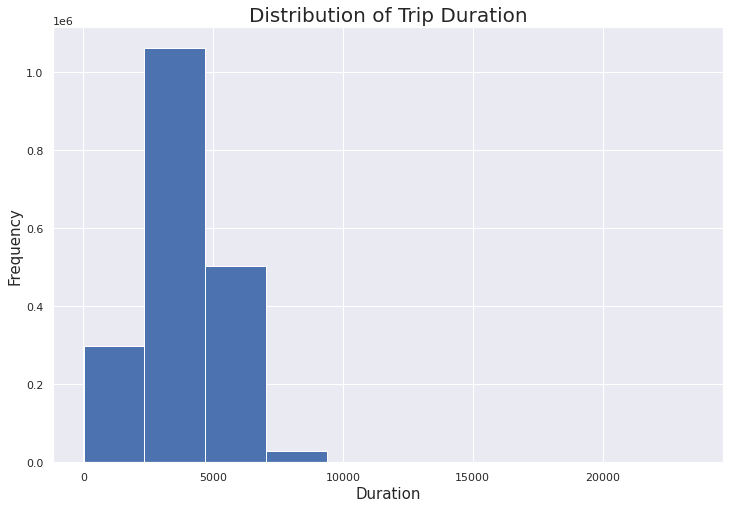

In [21]:
plt.figure(figsize=(12,8))
plt.hist(trips['DURATION'])
plt.title(f'Distribution of Trip Duration', size=20)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

In [22]:
line_ids = trips['LINEID'].unique()

In [23]:
# # Plot histogram of duration of each route
# for line in line_ids:
#     plt.figure(figsize=(12,8))
#     plt.hist(trips.loc[(trips['LINEID'] == line)]['DURATION'],label=line)
#     plt.title(f'Distribution of Trip Duration in {line}', size=20)
#     plt.xlabel('Duration', size=15)
#     plt.ylabel('Frequency', size=15)
#     plt.show()

As shown, the trip durations are approximately modelled by a normal distribution. As 99.7% of data lies within +/- 3 standard deviations from the mean, I will remove trips that are outside of this range.

In [24]:
from scipy.stats import zscore

In [25]:
trips

,TRIPID,LINEID,DURATION,HOUR,DAY,MONTH,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,6253783,68_1,2924.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,6261627,1_2,1238.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,6248587,45A_2,2278.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,6250096,70_2,1948.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,6260766,84_1,3570.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,6846737,41_2,2135.0,7,Sunday,May,13.39,9999.0,8.45,12.66,1018,72,6.7,60,0.0,0.0,0.0,75,Clouds
1893260,6767648,65_2,3505.0,0,Tuesday,May,4.39,9999.0,3.36,1.05,1029,93,4.1,320,0.0,0.0,0.0,20,Clouds
1893261,6759816,27_1,2981.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds
1893262,6756636,41_1,2267.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds


In [26]:
for line in line_ids:
    line_df = trips.loc[trips['LINEID']==line]
    line_df = line_df[(np.abs(zscore(line_df['DURATION'])) > 3)]
    trips.drop(line_df.index, axis=0, inplace=True)

In [27]:
trips

,TRIPID,LINEID,DURATION,HOUR,DAY,MONTH,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,6253783,68_1,2924.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,6261627,1_2,1238.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,6248587,45A_2,2278.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,6250096,70_2,1948.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,6260766,84_1,3570.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893259,6846737,41_2,2135.0,7,Sunday,May,13.39,9999.0,8.45,12.66,1018,72,6.7,60,0.0,0.0,0.0,75,Clouds
1893260,6767648,65_2,3505.0,0,Tuesday,May,4.39,9999.0,3.36,1.05,1029,93,4.1,320,0.0,0.0,0.0,20,Clouds
1893261,6759816,27_1,2981.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds
1893262,6756636,41_1,2267.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds


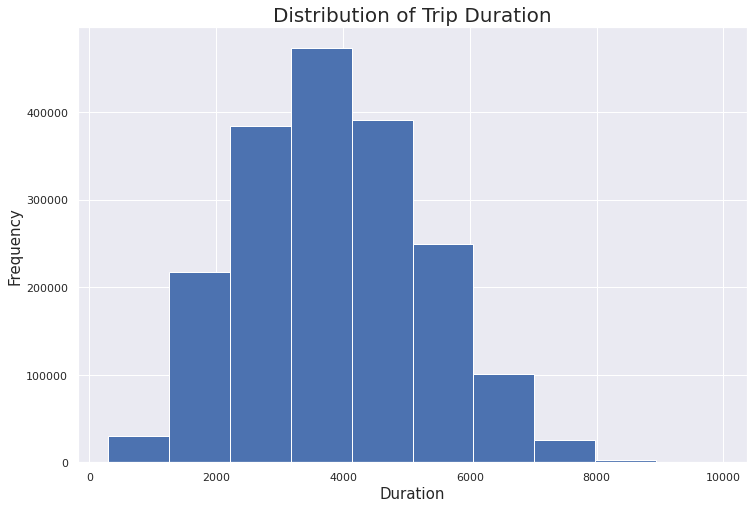

In [28]:
plt.figure(figsize=(12,8))
plt.hist(trips['DURATION'])
plt.title(f'Distribution of Trip Duration', size=20)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

In [29]:
trips.reset_index(drop=True, inplace=True)

In [30]:
trips

,TRIPID,LINEID,DURATION,HOUR,DAY,MONTH,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,6253783,68_1,2924.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,6261627,1_2,1238.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,6248587,45A_2,2278.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,6250096,70_2,1948.0,23,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,6260766,84_1,3570.0,0,Wednesday,February,6.39,9999.0,4.22,2.40,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873732,6846737,41_2,2135.0,7,Sunday,May,13.39,9999.0,8.45,12.66,1018,72,6.7,60,0.0,0.0,0.0,75,Clouds
1873733,6767648,65_2,3505.0,0,Tuesday,May,4.39,9999.0,3.36,1.05,1029,93,4.1,320,0.0,0.0,0.0,20,Clouds
1873734,6759816,27_1,2981.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds
1873735,6756636,41_1,2267.0,5,Tuesday,May,13.39,9999.0,11.45,13.08,1022,88,2.6,240,0.0,0.0,0.0,75,Clouds


In [39]:
trips.dtypes

TRIPID           object
LINEID           object
DURATION        float64
HOUR              int64
DAY              object
MONTH            object
temp            float64
visibility      float64
dew_point       float64
feels_like      float64
pressure          int64
humidity          int64
wind_speed      float64
wind_deg          int64
wind_gust       float64
rain_1h         float64
snow_1h         float64
clouds_all        int64
weather_main     object
dtype: object

In [40]:
# convert to categorical 
trips['DAY'] = trips['DAY'].astype('category')
trips['MONTH'] = trips['MONTH'].astype('category')
trips['weather_main'] = trips['weather_main'].astype('category')

trips.dtypes

TRIPID            object
LINEID            object
DURATION         float64
HOUR               int64
DAY             category
MONTH           category
temp             float64
visibility       float64
dew_point        float64
feels_like       float64
pressure           int64
humidity           int64
wind_speed       float64
wind_deg           int64
wind_gust        float64
rain_1h          float64
snow_1h          float64
clouds_all         int64
weather_main    category
dtype: object

In [51]:
continuous_columns = trips.select_dtypes(['int64', 'float64']).columns
continuous_columns

Index(['DURATION', 'HOUR', 'temp', 'visibility', 'dew_point', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'snow_1h', 'clouds_all'],
      dtype='object')

In [42]:
category_columns = trips.select_dtypes(['category']).columns
category_columns

Index(['DAY', 'MONTH', 'weather_main'], dtype='object')

In [52]:
trips[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
DURATION,1873737.0,3856.106053,1415.451650,294.00,2815.00,3776.00,4841.00,9897.00
HOUR,1873737.0,14.017211,4.920631,0.00,10.00,14.00,18.00,23.00
temp,1873737.0,11.462252,5.570212,-4.61,7.39,11.39,15.39,26.92
visibility,1873737.0,9634.329025,1365.429512,100.00,9999.00,9999.00,9999.00,10000.00
dew_point,1873737.0,7.192056,4.635106,-7.99,4.05,7.33,10.38,18.88
feels_like,1873737.0,9.728806,6.988286,-10.61,4.07,10.35,15.13,26.49
pressure,1873737.0,1012.647251,11.665906,979.00,1005.00,1014.00,1021.00,1041.00
humidity,1873737.0,76.415570,13.480349,25.00,67.00,77.00,87.00,100.00
wind_speed,1873737.0,5.326632,2.675459,0.00,3.60,5.10,6.70,18.50
wind_deg,1873737.0,190.047795,89.394759,0.00,130.00,210.00,260.00,360.00


In [44]:
trips[category_columns].describe().T

,count,unique,top,freq
DAY,1873737,7,Tuesday,304935
MONTH,1873737,12,January,169496
weather_main,1873737,8,Clouds,1217659


In [45]:
trips.to_csv('trips_cleaned_2.csv', index=False)

# Exploring relationships between feature pairs

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'DURATION'),
  Text(1.5, 0, 'HOUR'),
  Text(2.5, 0, 'temp'),
  Text(3.5, 0, 'visibility'),
  Text(4.5, 0, 'dew_point'),
  Text(5.5, 0, 'feels_like'),
  Text(6.5, 0, 'pressure'),
  Text(7.5, 0, 'humidity'),
  Text(8.5, 0, 'wind_speed'),
  Text(9.5, 0, 'wind_deg'),
  Text(10.5, 0, 'wind_gust'),
  Text(11.5, 0, 'rain_1h'),
  Text(12.5, 0, 'snow_1h'),
  Text(13.5, 0, 'clouds_all')])

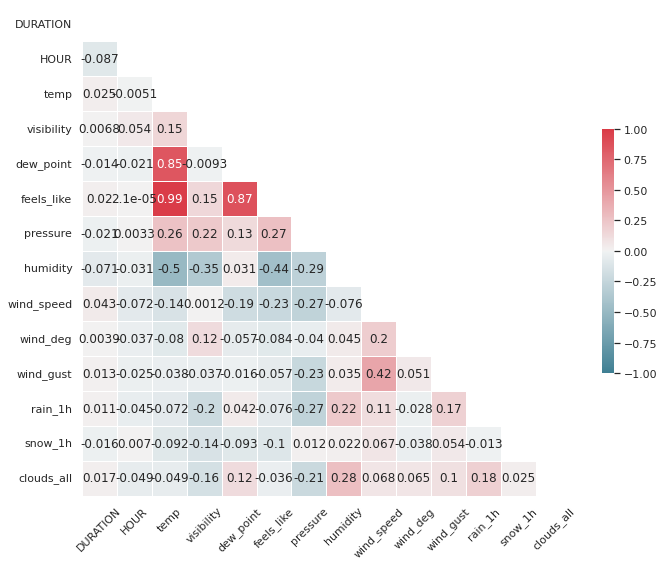

In [54]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = trips[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:xlabel='humidity', ylabel='temp'>

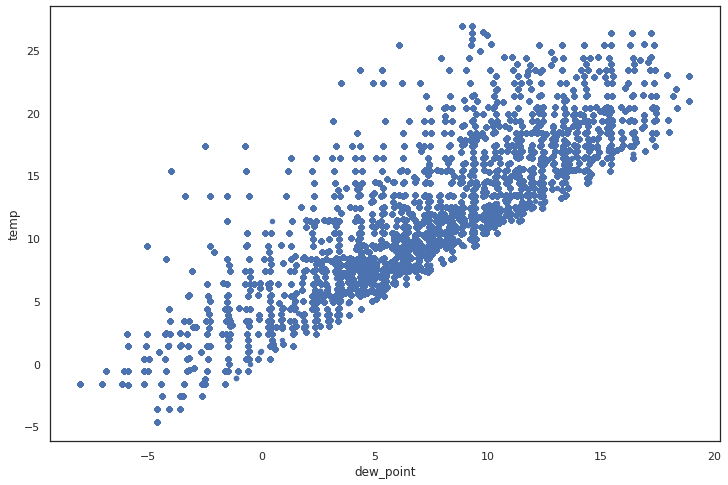

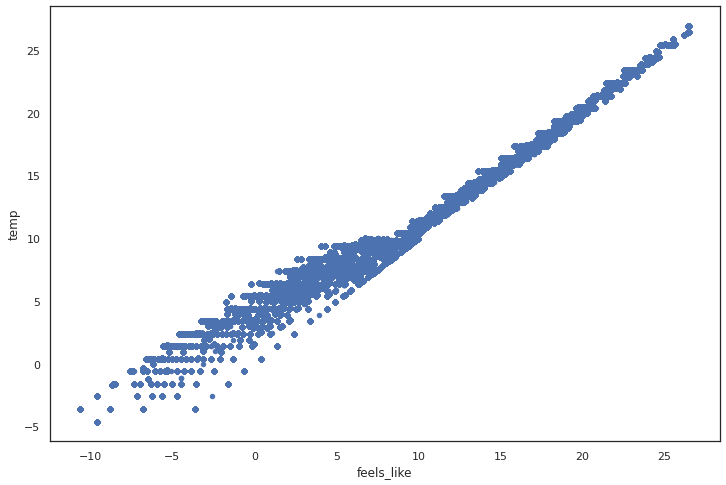

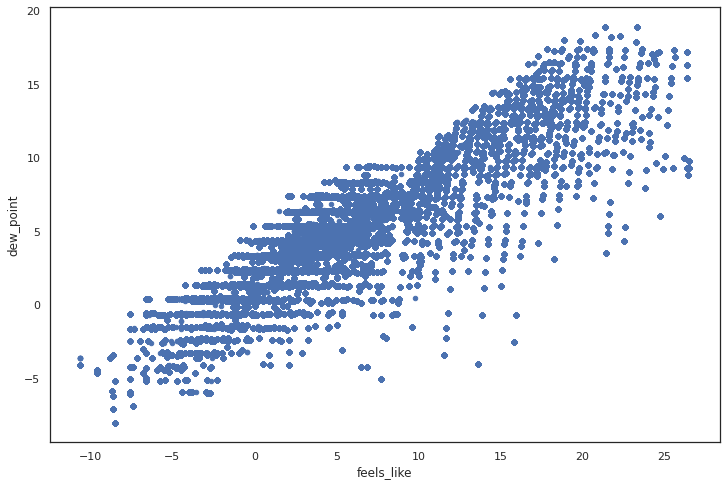

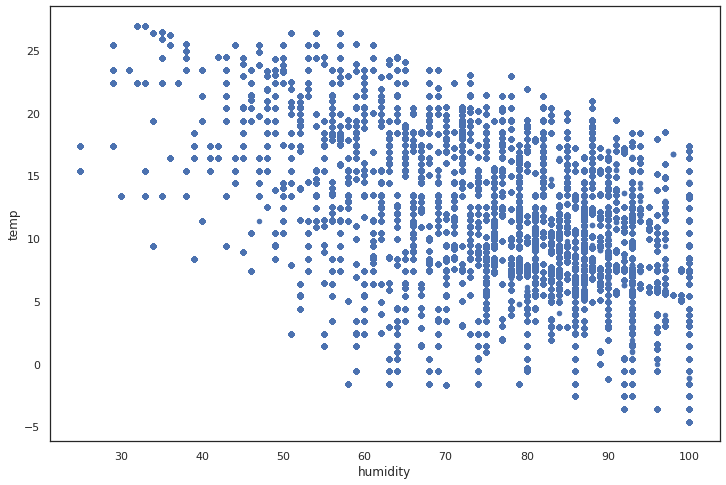

In [55]:
trips.plot(kind='scatter', x='dew_point', y='temp')
trips.plot(kind='scatter', x='feels_like', y='temp')
trips.plot(kind='scatter', x='feels_like', y='dew_point')
trips.plot(kind='scatter', x='humidity', y='temp')

In [56]:
import calendar
months = []
for i in range(1,13):
  months.append(calendar.month_name[i])
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Text(0.5, 1.0, 'Trip Duration By Day')

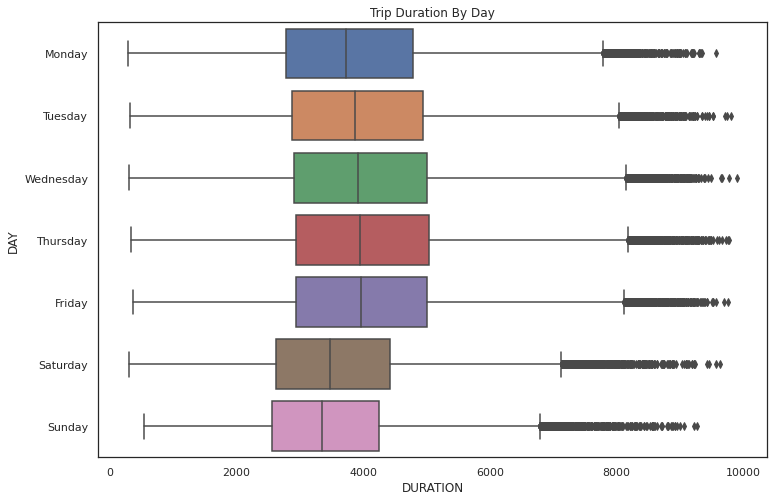

In [57]:
sns.boxplot(x=trips['DURATION'], y=trips['DAY'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).set_title("Trip Duration By Day")

Text(0.5, 1.0, 'Trip Duration By Month')

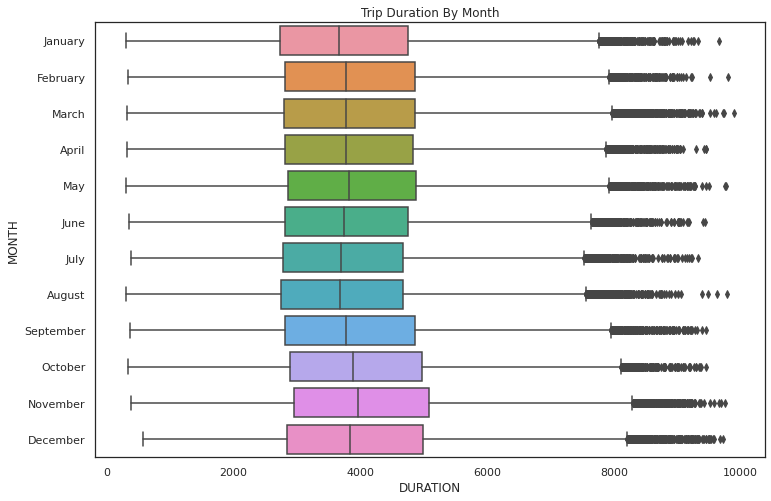

In [58]:
sns.boxplot(x=trips['DURATION'], y=trips['MONTH'], order=months).set_title("Trip Duration By Month")

Text(0.5, 1.0, 'Trip Duration Of Bus Routes')

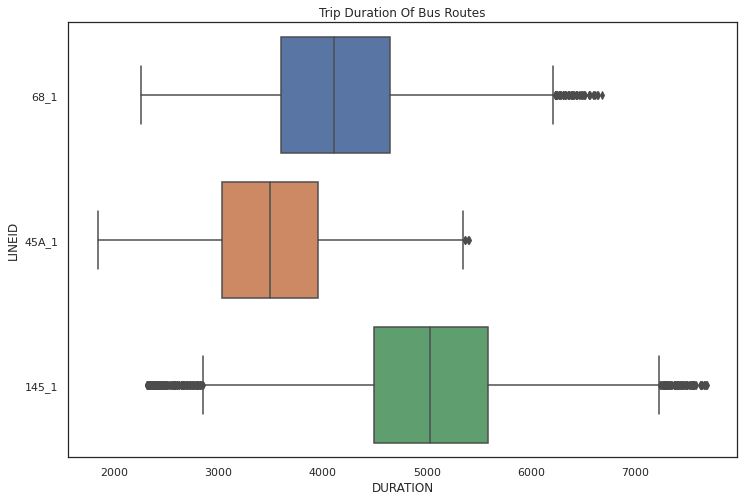

In [59]:
sns.boxplot(x=trips['DURATION'], y=trips.loc[(trips['LINEID'] == '145_1') | (trips['LINEID'] == '68_1') | (trips['LINEID'] == '45A_1')]['LINEID']).set_title("Trip Duration Of Bus Routes")

Text(0.5, 1.0, 'Trip Duration By weather_main')

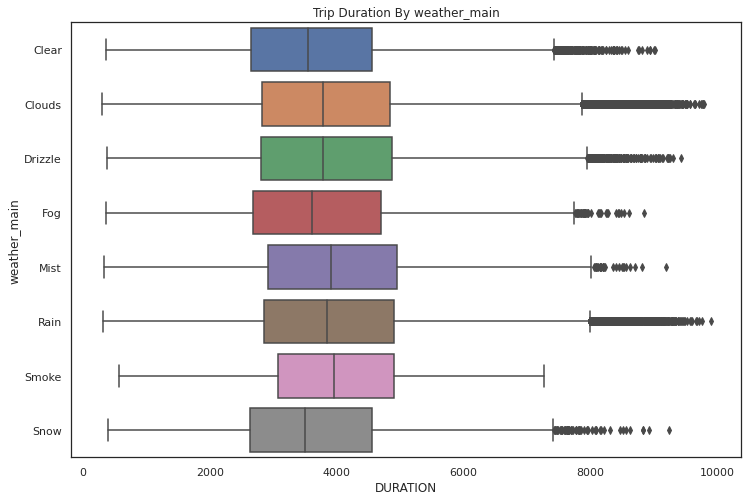

In [60]:
sns.boxplot(x=trips['DURATION'], y=trips['weather_main']).set_title("Trip Duration By weather_main")

# Read cleaned data with new features

In [61]:
trips = pd.read_csv('trips_cleaned_2.csv')
trips.head()

,TRIPID,LINEID,DURATION,HOUR,DAY,MONTH,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main
0,6253783,68_1,2924.0,0,Wednesday,February,6.39,9999.0,4.22,2.4,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
1,6261627,1_2,1238.0,0,Wednesday,February,6.39,9999.0,4.22,2.4,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
2,6248587,45A_2,2278.0,23,Wednesday,February,6.39,9999.0,4.22,2.4,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
3,6250096,70_2,1948.0,23,Wednesday,February,6.39,9999.0,4.22,2.4,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds
4,6260766,84_1,3570.0,0,Wednesday,February,6.39,9999.0,4.22,2.4,1015,86,6.7,220,0.0,0.0,0.0,75,Clouds


In [62]:
trips.dtypes

TRIPID            int64
LINEID           object
DURATION        float64
HOUR              int64
DAY              object
MONTH            object
temp            float64
visibility      float64
dew_point       float64
feels_like      float64
pressure          int64
humidity          int64
wind_speed      float64
wind_deg          int64
wind_gust       float64
rain_1h         float64
snow_1h         float64
clouds_all        int64
weather_main     object
dtype: object

In [63]:
trips.select_dtypes(['object']).columns

Index(['LINEID', 'DAY', 'MONTH', 'weather_main'], dtype='object')

In [64]:
# convert feature 'TRIPID' to object
trips['TRIPID'] = trips['TRIPID'].astype('object')

# convert to categorical 
trips['DAY'] = trips['DAY'].astype('category')
trips['MONTH'] = trips['MONTH'].astype('category')
trips['weather_main'] = trips['weather_main'].astype('category')

trips.dtypes

TRIPID            object
LINEID            object
DURATION         float64
HOUR               int64
DAY             category
MONTH           category
temp             float64
visibility       float64
dew_point        float64
feels_like       float64
pressure           int64
humidity           int64
wind_speed       float64
wind_deg           int64
wind_gust        float64
rain_1h          float64
snow_1h          float64
clouds_all         int64
weather_main    category
dtype: object

In [65]:
numeric_columns = trips.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['DURATION', 'HOUR', 'temp', 'visibility', 'dew_point', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'snow_1h', 'clouds_all'],
      dtype='object')

In [66]:
category_columns = trips.select_dtypes(['category']).columns
category_columns

Index(['DAY', 'MONTH', 'weather_main'], dtype='object')